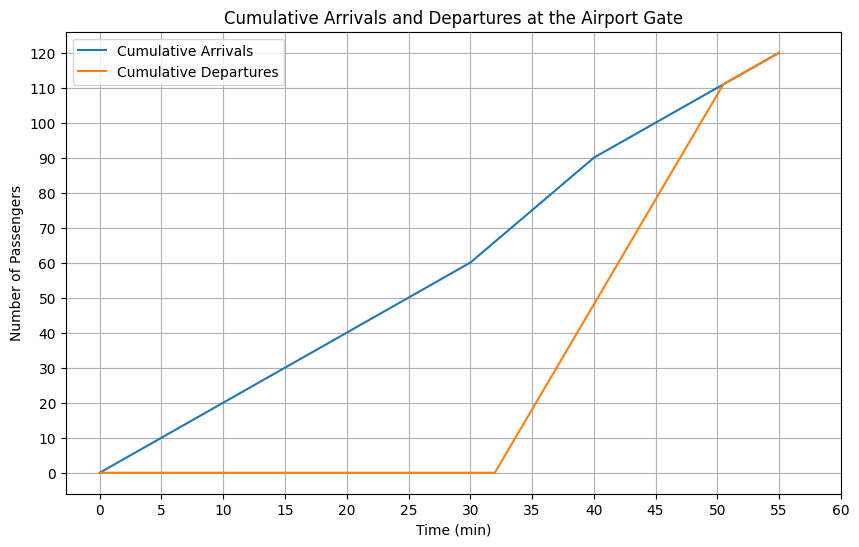

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define time intervals
time = np.arange(0, 55.01, 0.01)

# Define arrival rates, starting from zero at t = 0
arrival_rate = np.where(time == 0, 0, np.where(time < 30, 2, np.where(time < 40, 3, np.where(time < 55, 2, 0))))

# Initialize departure rates
departure_rate = np.zeros(len(time))

# Calculate cumulative arrivals
cumulative_arrivals = np.cumsum(arrival_rate * 0.01)

# Set departure rate conditions
for t in range(len(time)):
    if time[t] < 32:
        departure_rate[t] = 0
    elif time[t] > 0 and np.sum(departure_rate[:t]) < np.sum(arrival_rate[:t]):
        departure_rate[t] = 6
    else:
        departure_rate[t] = arrival_rate[t]

# Calculate cumulative departures with updated rates
cumulative_departures = np.cumsum(departure_rate * 0.01)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, cumulative_arrivals, label='Cumulative Arrivals')
plt.plot(time, cumulative_departures, label='Cumulative Departures')
plt.xlabel('Time (min)')
plt.ylabel('Number of Passengers')
plt.legend()
plt.title('Cumulative Arrivals and Departures at the Airport Gate')

# Set x-ticks and y-ticks
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, max(cumulative_arrivals)+10, 10))

plt.grid(True)
plt.show()
